In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [19]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [20]:
# Enter your solution here
num_samples = X.shape[0]
print(f"Number of samples in the dataset: {num_samples}")

Number of samples in the dataset: 1998


## Problem 2

How many features are there in the dataset?


## Solution

In [21]:
# Enter your solution here
num_features = X.shape[1]
print(f"Number of features in the dataset: {num_features}")

Number of features in the dataset: 2


## Problem 3
Plot the dataset using matplotlib.



## Solution

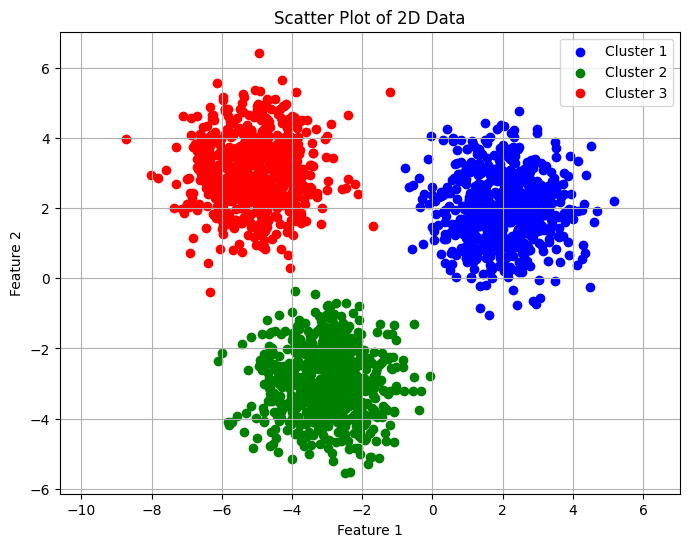

In [22]:
# Enter your solution here
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Cluster 1')
plt.scatter(data2[:, 0], data2[:, 1], color='green', label='Cluster 2')
plt.scatter(data3[:, 0], data3[:, 1], color='red', label='Cluster 3')
plt.title('Scatter Plot of 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


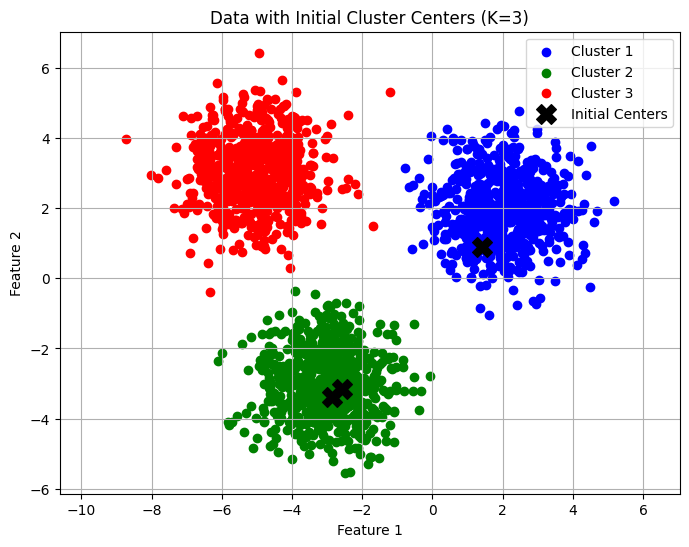

In [23]:
# Enter your code here
initial_centers = X[[200, 800, 1200]]

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Cluster 1')
plt.scatter(data2[:, 0], data2[:, 1], color='green', label='Cluster 2')
plt.scatter(data3[:, 0], data3[:, 1], color='red', label='Cluster 3')

# Plot initial cluster centers
plt.scatter(initial_centers[:, 0], initial_centers[:, 1],
            color='black', marker='X', s=200, label='Initial Centers')

# Plot details
plt.title('Data with Initial Cluster Centers (K=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [24]:
# Enter your solution here

def assign_clusters(X, k, cluster_centers):
    # Compute the Euclidean distance between each point and each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers, axis=2)  # shape: (N, k)
    # Assign each point to the nearest center
    z = np.argmin(distances, axis=1)
    return z

# Initial centers at indices 200, 800, 1200
k = 3
initial_centers = X[[200, 800, 1200]]

# Assign clusters
z = assign_clusters(X, k, initial_centers)

# Compute the mean of z
mean_z = np.mean(z)
print(f"Mean of z: {mean_z:.3f}")



Mean of z: 0.711


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

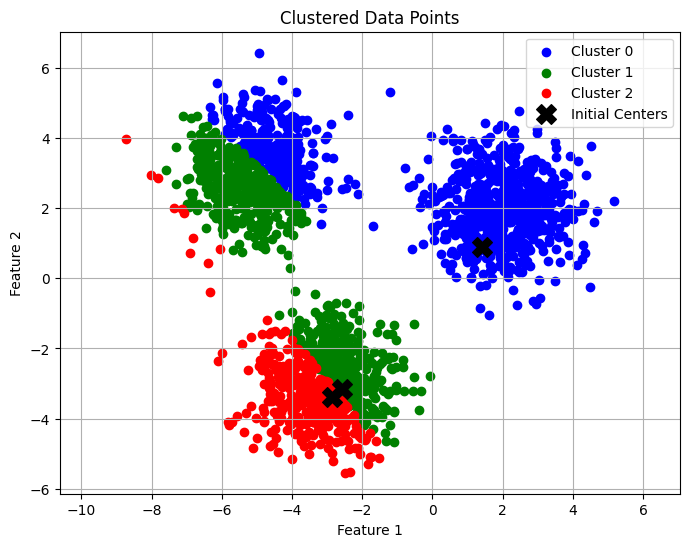

In [25]:
# Enter your solution here

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for cluster_id in range(k):
    plt.scatter(X[z == cluster_id, 0], X[z == cluster_id, 1],
                color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Plot the initial cluster centers
plt.scatter(initial_centers[:, 0], initial_centers[:, 1],
            color='black', marker='X', s=200, label='Initial Centers')

plt.title('Clustered Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [26]:
# Enter your solution here

def compute_cluster_centers(X, z, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        centers[i] = X[z == i].mean(axis=0)
    return centers


new_centers = compute_cluster_centers(X, z, k)

# Compute the mean of the three centers
mean_center = new_centers.mean(axis=0)
x1, y1 = mean_center

# Print result
print(f"Mean of cluster centers: x1 = {x1:.3f}, y1 = {y1:.3f}")


Mean of cluster centers: x1 = -2.553, y1 = -0.192


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

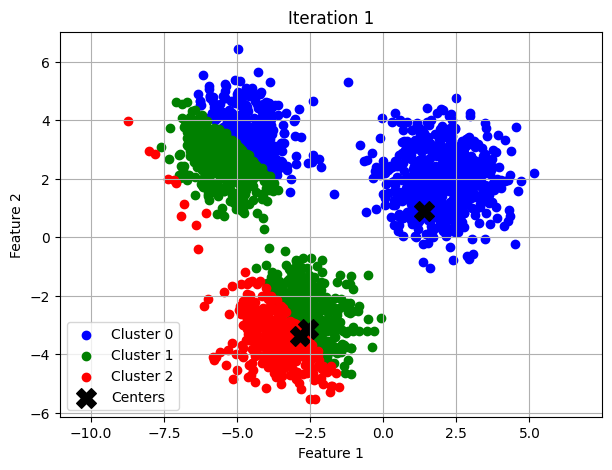

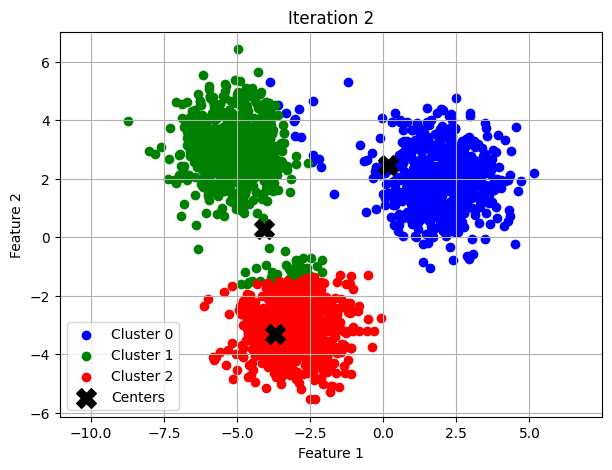

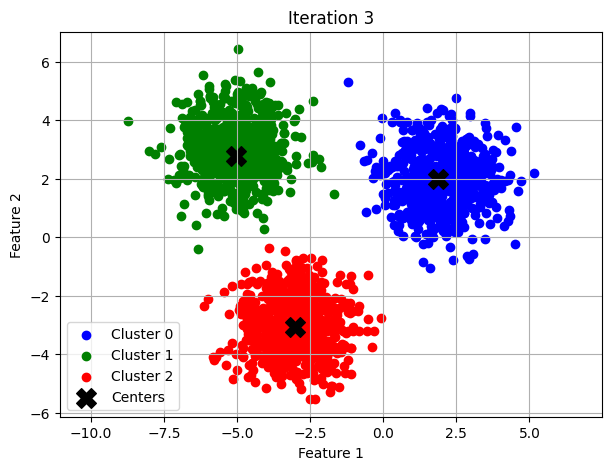

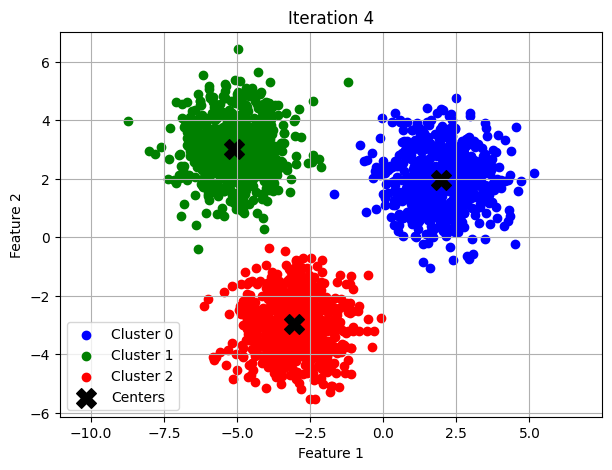

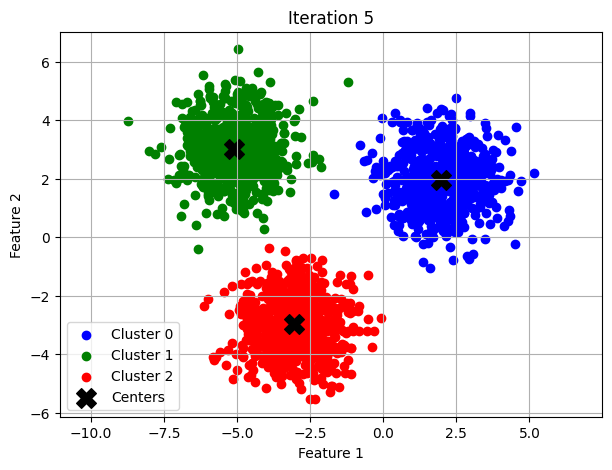

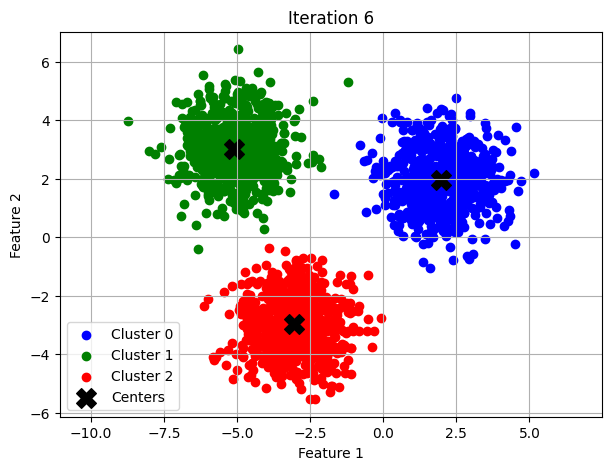

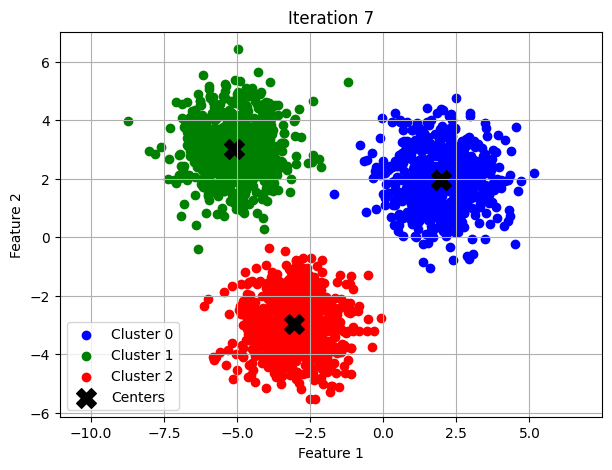

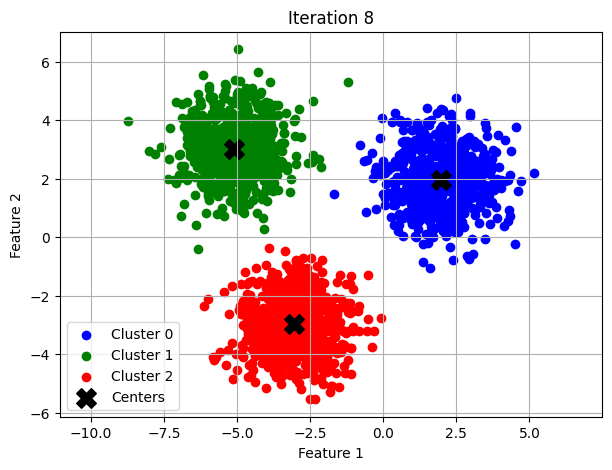

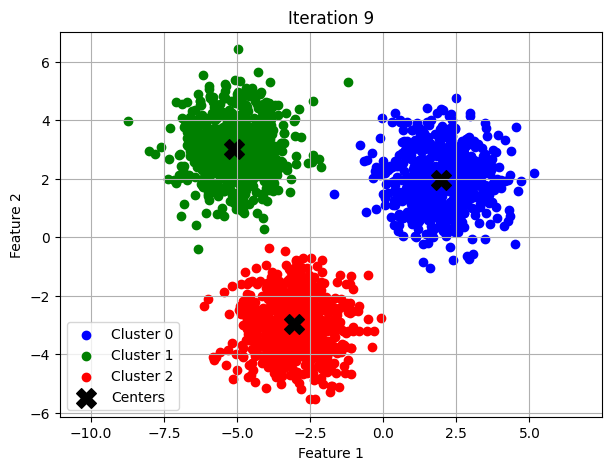

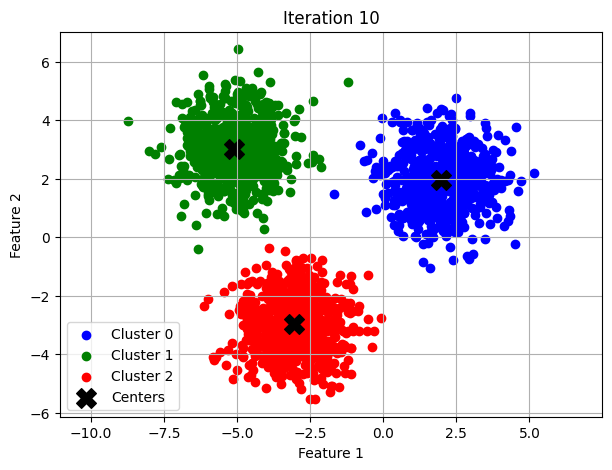

Final mean of cluster centers: x1 = -2.050, y1 = 0.661


In [28]:
# Enter your code here

k = 3
cluster_centers = X[[200, 800, 1200]]

# K-means loop
for iteration in range(10):
    # Step 1: Assign clusters
    z = assign_clusters(X, k, cluster_centers)

    # Step 2: Plot current state
    plt.figure(figsize=(7, 5))
    colors = ['blue', 'green', 'red']
    for cluster_id in range(k):
        plt.scatter(X[z == cluster_id, 0], X[z == cluster_id, 1],
                    color=colors[cluster_id], label=f'Cluster {cluster_id}')

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                color='black', marker='X', s=200, label='Centers')
    plt.title(f'Iteration {iteration + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # Step 3: Update cluster centers
    cluster_centers = compute_cluster_centers(X, z, k)

# Final mean center (optional)
mean_center = cluster_centers.mean(axis=0)
print(f"Final mean of cluster centers: x1 = {mean_center[0]:.3f}, y1 = {mean_center[1]:.3f}")